# PennyLane: Variational classifier with Iris data

Basics regarding amplitude encoding and quantum neural network layers

In [34]:

# install
# !pip3 install pennylane
# !pip3 install pennylane-qiskit
# !pip3 install pylatexenc

# imports
import pennylane as qml
# from pennylane import numpy as np
import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
import matplotlib.pyplot as plt

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi

%matplotlib inline


# State changes when using the same rotation gate with different angles on the bloch sphere

If we take two or more angles and rotate them sequentially using the same qubit, the angles are summed up or substracted depending on their sign

angles 0.7853981633974483 0.39269908169872414 -0.7853981633974483


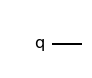

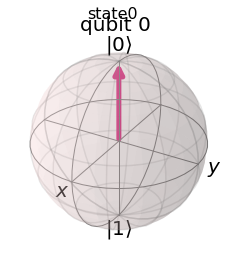

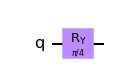

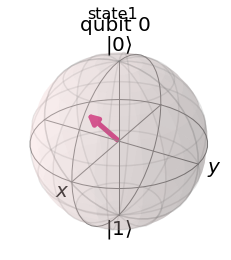

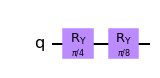

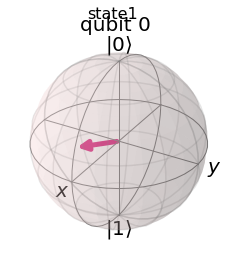

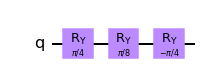

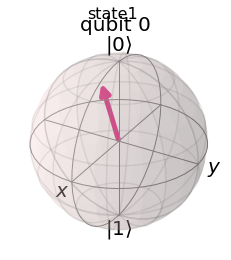

In [108]:
angle1= pi/4
angle2= pi/8
angle3= -pi/4

print("angles", angle1, angle2, angle3)

# no angles / initial state
circuit = QuantumCircuit(1)
display(circuit.draw(output='mpl'))
state0 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state0, title="state0", reverse_bits=False))

# angle1
circuit = QuantumCircuit(1)
circuit.ry(angle1,0)
display(circuit.draw(output='mpl'))
state1 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state1, title="state1", reverse_bits=False))

# angle1 and angle2
circuit = QuantumCircuit(1)
circuit.ry(angle1,0); circuit.ry(angle2,0)
display(circuit.draw(output='mpl'))
state1 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state1, title="state1", reverse_bits=False))

# angle1 and angle2 and angle3
circuit = QuantumCircuit(1)
circuit.ry(angle1,0); circuit.ry(angle2,0); circuit.ry(angle3,0)
display(circuit.draw(output='mpl'))
state1 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state1, title="state1", reverse_bits=False))


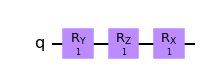

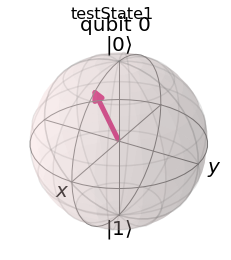

In [76]:
# other test 
circuit = QuantumCircuit(1)
circuit.ry(1,0)
circuit.rz(1,0)
circuit.rx(1,0)
display(circuit.draw(output='mpl'))
testState1 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(testState1, title="testState1", reverse_bits=False))

# Circuit plots and bloch spheres for **Step 1** (state preparation / amplitude encoding)

We will define and use the first preprocessed data set `firstAngles` as input for the apmlitudes. 

Next, we will go through the most important changes of the `statePreparation` circuit step by step.


**The final circuit and the bloch sphere representation of the state vectors:**

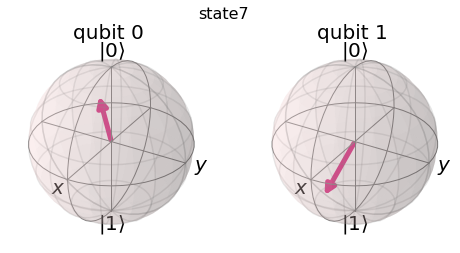

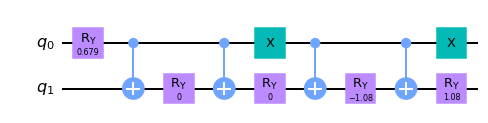

In [36]:
firstAngles = [0.67858523, -0, 0, -1.080839, 1.080839] # first data example (preprocessed angles)

def statePreparation(angles):
  circuit = QuantumCircuit(2)
  circuit.ry(firstAngles[0],0)
  circuit.cx(0, 1)
  circuit.ry(firstAngles[1],1)
  circuit.cx(0, 1)
  circuit.ry(firstAngles[2],1)
  
  circuit.x(0)
  
  circuit.cx(0, 1)
  circuit.ry(firstAngles[3],1)
  circuit.cx(0, 1)
  circuit.ry(firstAngles[4],1)
  
  circuit.x(0)
  
  state7 = Statevector.from_instruction(circuit)
  display(plot_bloch_multivector(state7, title="state7", reverse_bits=False))
  display(circuit.draw(output='mpl'))

statePreparation(firstAngles)

How does the bloch sphere look like if we only apply a Rotation on Y?

We define a Circuit with 2 qubits and apply a Y rotation using the first angles of the `firstAngles` array:

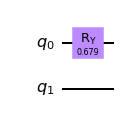

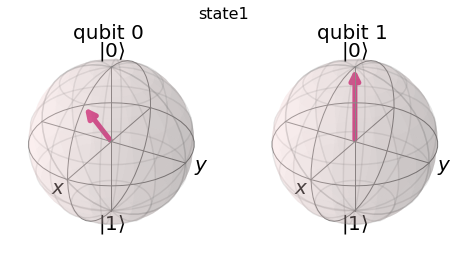

In [37]:
circuit = QuantumCircuit(2)
circuit.ry(firstAngles[0],0)

display(circuit.draw(output='mpl'))

state1 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state1, title="state1", reverse_bits=False))


Next we will apply a CNOT from qubit 0 to qubit 1 
... and another Y rotation on qubit 1

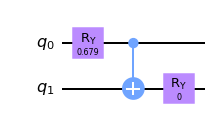

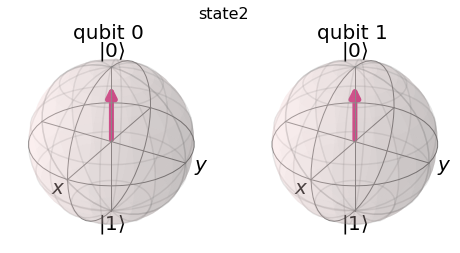

In [38]:
circuit = QuantumCircuit(2)
circuit.ry(firstAngles[0],0)
circuit.cx(0, 1)
circuit.ry(firstAngles[1],1)

display(circuit.draw(output='mpl'))

state2 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state2, title="state2", reverse_bits=False))

Next another CNOT from qubit 0 to qubit 1 
... and another Y rotation on qubit 1

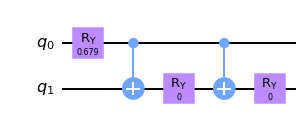

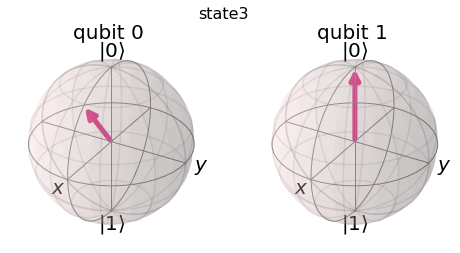

In [39]:
circuit = QuantumCircuit(2)
circuit.ry(firstAngles[0],0)
circuit.cx(0, 1)
circuit.ry(firstAngles[1],1)
circuit.cx(0, 1)
circuit.ry(firstAngles[2],1)

display(circuit.draw(output='mpl'))

state3 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state3, title="state3", reverse_bits=False))

Next we apply a X gate on qubit 0 (PauliX or bit-flip gate)

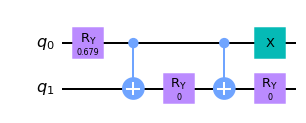

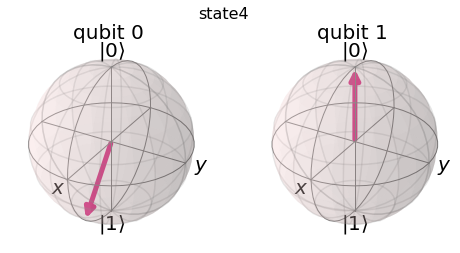

In [40]:
circuit = QuantumCircuit(2)
circuit.ry(firstAngles[0],0)
circuit.cx(0, 1)
circuit.ry(firstAngles[1],1)
circuit.cx(0, 1)
circuit.ry(firstAngles[2],1)

circuit.x(0)

display(circuit.draw(output='mpl'))

state4 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state4, title="state4", reverse_bits=False))

We add another CNOT from qubit 0 to qubit 1 
... and another Y rotation on qubit 1

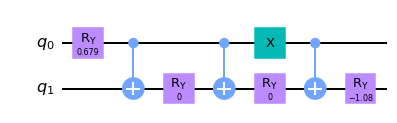

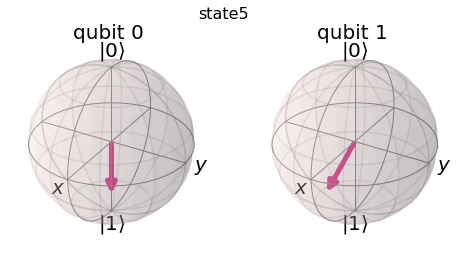

In [41]:
circuit = QuantumCircuit(2)
circuit.ry(firstAngles[0],0)
circuit.cx(0, 1)
circuit.ry(firstAngles[1],1)
circuit.cx(0, 1)
circuit.ry(firstAngles[2],1)

circuit.x(0)

circuit.cx(0, 1)
circuit.ry(firstAngles[3],1)

display(circuit.draw(output='mpl'))

state5 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state5, title="state5", reverse_bits=False))

And the last CNOT from qubit 0 to qubit 1 
... and the last Y rotation on qubit 1

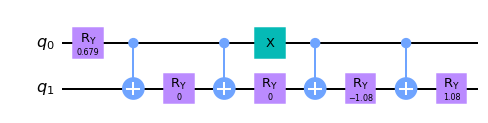

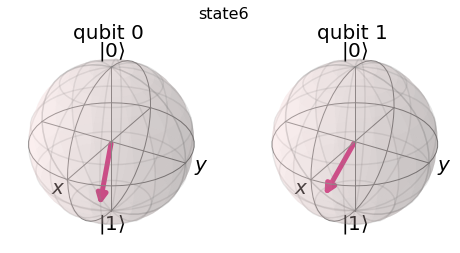

In [42]:
circuit = QuantumCircuit(2)
circuit.ry(firstAngles[0],0)
circuit.cx(0, 1)
circuit.ry(firstAngles[1],1)
circuit.cx(0, 1)
circuit.ry(firstAngles[2],1)

circuit.x(0)

circuit.cx(0, 1)
circuit.ry(firstAngles[3],1)
circuit.cx(0, 1)
circuit.ry(firstAngles[4],1)

display(circuit.draw(output='mpl'))

state6 = Statevector.from_instruction(circuit)
display(plot_bloch_multivector(state6, title="state6", reverse_bits=False))

Finally we apply a X gate (PauliX or bit-flip gate) on qubit 0 again

We encoded now all amplitudes into the two qubits

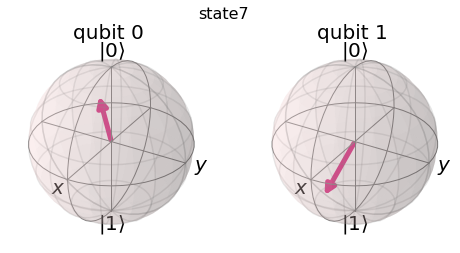

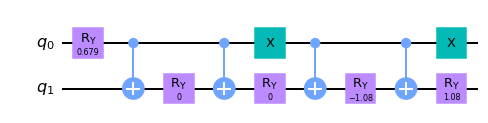

In [43]:
statePreparation(firstAngles)

# Circuit plots and bloch spheres for QNN Layer **Step 2**

We will define and use the some randomly created `weights` as input for the example layer. 

Next, we will go through the most important changes of the `layer` circuit step by step.


**The final layer circuit and the bloch sphere representation of the state vectors:**

layer[0] weights:
[[-1.47259812 -2.12389414 -0.6961385 ]
 [ 0.39289768  0.28304916  0.07418981]]


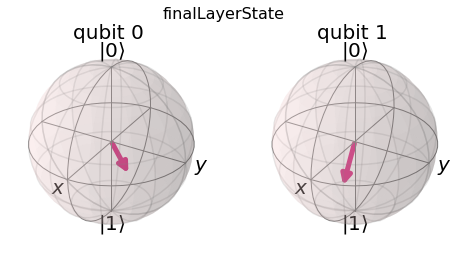

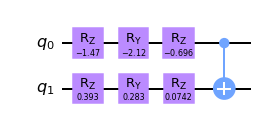

layer[0] weights:
[[-1.47259812 -2.12389414 -0.6961385 ]
 [ 0.39289768  0.28304916  0.07418981]]
layer[1] weights:
[[ 0.40919219 -0.5461247  -0.02270871]
 [ 2.29168717 -0.61918062 -0.32773199]]


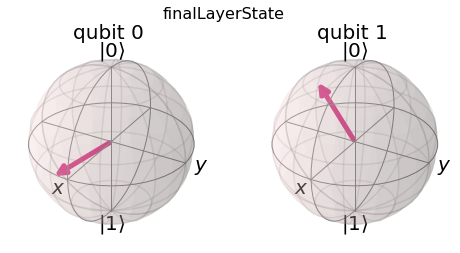

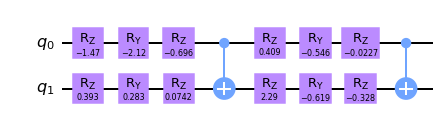

layer[0] weights:
[[-1.47259812 -2.12389414 -0.6961385 ]
 [ 0.39289768  0.28304916  0.07418981]]
layer[1] weights:
[[ 0.40919219 -0.5461247  -0.02270871]
 [ 2.29168717 -0.61918062 -0.32773199]]
layer[2] weights:
[[ 2.41892023 -0.06746842 -0.61518579]
 [-0.07872919 -0.86172901  0.55136426]]


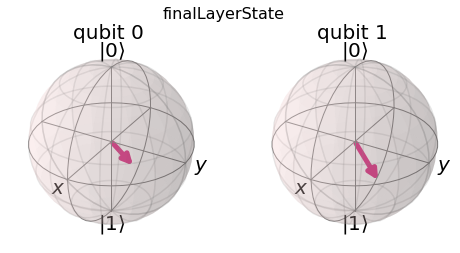

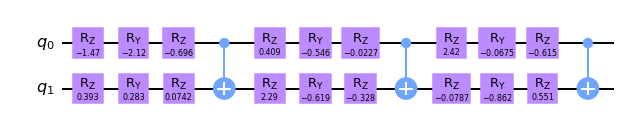

layer[0] weights:
[[-1.47259812 -2.12389414 -0.6961385 ]
 [ 0.39289768  0.28304916  0.07418981]]
layer[1] weights:
[[ 0.40919219 -0.5461247  -0.02270871]
 [ 2.29168717 -0.61918062 -0.32773199]]
layer[2] weights:
[[ 2.41892023 -0.06746842 -0.61518579]
 [-0.07872919 -0.86172901  0.55136426]]
layer[3] weights:
[[-0.81251448  0.16431821  1.55144624]
 [ 0.79669997  0.5965794  -0.18700373]]


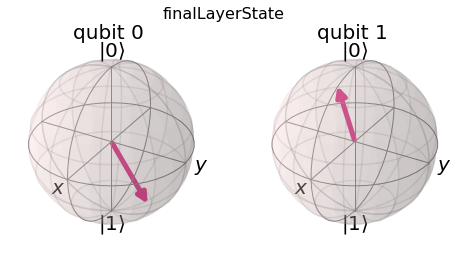

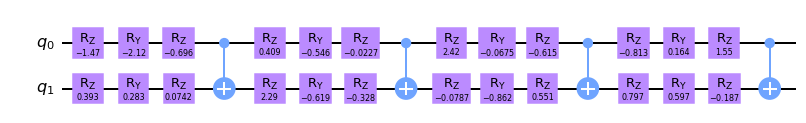

layer[0] weights:
[[-1.47259812 -2.12389414 -0.6961385 ]
 [ 0.39289768  0.28304916  0.07418981]]
layer[1] weights:
[[ 0.40919219 -0.5461247  -0.02270871]
 [ 2.29168717 -0.61918062 -0.32773199]]
layer[2] weights:
[[ 2.41892023 -0.06746842 -0.61518579]
 [-0.07872919 -0.86172901  0.55136426]]
layer[3] weights:
[[-0.81251448  0.16431821  1.55144624]
 [ 0.79669997  0.5965794  -0.18700373]]
layer[4] weights:
[[-1.19156238  2.10777027  0.55812622]
 [-0.21683031 -0.21372073 -0.14883789]]


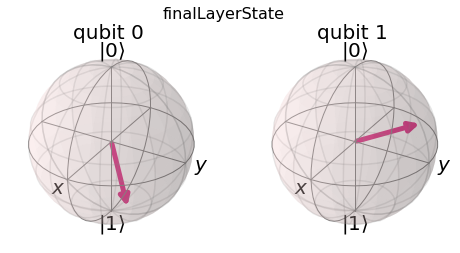

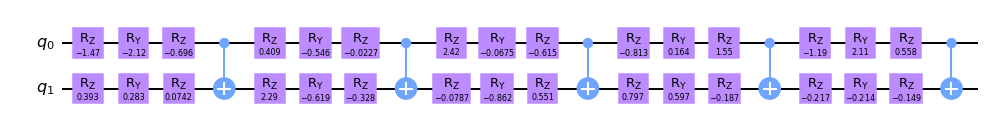

In [106]:

up_to_max_layers = 5 # <= only change me

num_qubits = 2
# removed 0.01 to have bigger angles (otherwise you can't see anything)
weights = np.random.randn(up_to_max_layers, num_qubits, 3)

# original weights initial random config
# weights = 0.01 * np.random.randn(up_to_max_layers, num_qubits, 3)

def layer(circuit, w):
    circuit.rz(w[0, 0],0) # qubit[0]
    circuit.rz(w[1, 0],1) # qubit[1]
    
    circuit.ry(w[0, 1],0) # qubit[0]
    circuit.ry(w[1, 1],1) # qubit[1]
    
    circuit.rz(w[0, 2],0) # qubit[0]
    circuit.rz(w[1, 2],1) # qubit[1]
    
    circuit.cx(0, 1)

def demo_layers(num_layers, weights):
  for index, w in enumerate(weights):
    print("layer[{layer}] weights:\n{weights}".format(layer=index, weights=w))

  def layer_circuit(weights):
    circuit = QuantumCircuit(num_qubits)
    for w in weights:
      layer(circuit, w)

    finalLayerState = Statevector.from_instruction(circuit)
    display(plot_bloch_multivector(finalLayerState, title="finalLayerState", reverse_bits=False))
    display(circuit.draw(output='mpl'))
    # print(circuit.draw())

  layer_circuit(weights)

for i in range(up_to_max_layers): 
  demo_layers(i+1, weights[0:i+1])

  